## Google Drive Mount

- account: leeyeoreum01@gmail.com

In [1]:
from google.colab import drive   # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

drive.mount('/content/gdrive/')  # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


## Google Drive Working Directory Select

- csv_file_dir = 'tensorflow_2.x_working_dir'
- ipynb_file_dir = 'Colab Notebooks'

In [2]:
%tensorflow_version 1.x

import tensorflow as tf
import os
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


working_dir = 'tensorflow_2.x_working_dir'

colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

original_dir = os.getcwd()

try:

  os.chdir(colab_default_dir)

  if not os.path.exists(working_dir):
    os.mkdir(working_dir)

  os.chdir(working_dir)
  print("current dir = ", os.getcwd())

except Exception as err:
  
  os.chdir(original_dir)
  print(str(err))

TensorFlow 1.x selected.
current dir =  /content/gdrive/My Drive/Colab Notebooks/tensorflow_2.x_working_dir


## File Upload From Google Drive Working Directory

- titanic_train.csv
- titanic_test.csv

In [3]:
try:
  
  original_train_df = pd.read_csv('./titanic_train.csv')
  original_test_df = pd.read_csv('./titanic_test.csv')

  print("original_train_df.shape = ", original_train_df.shape, ", original_test_df.shape = ", original_test_df.shape)

except Exception as err:
  
  print(str(err))

original_train_df.shape =  (891, 12) , original_test_df.shape =  (418, 11)


In [4]:
original_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
original_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## CSV File Preprocessing

- Using row
> [ [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- transforming non_float data to float data ('Sex' row)
- processing missing data
> - 'Age' row -> mean value
> - 'Fare' row -> median value



In [6]:
print("[original_train_df.isnull().sum()]\n", original_train_df.isnull().sum())
print("\n\n[original_test_df.isnull().sum()]\n", original_test_df.isnull().sum())

[original_train_df.isnull().sum()]
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


[original_test_df.isnull().sum()]
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
train_df = original_train_df[ ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] ]

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
test_df = original_test_df[ ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'] ]

test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [9]:
print("[train_df.isnull().sum()]\n", train_df.isnull().sum())
print("\n\n[test_df.isnull().sum()]\n", test_df.isnull().sum())

[train_df.isnull().sum()]
 Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


[test_df.isnull().sum()]
 Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64


In [10]:
train_df["Sex"] = train_df["Sex"].apply(lambda x: 0 if x == "male" else 1)

train_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [11]:
test_df["Sex"] = test_df["Sex"].apply(lambda x: 0 if x == "male" else 1)

test_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [12]:
print("train_df Age mean = ", train_df['Age'].mean())
print("train_df Age median = ", train_df['Age'].median())

print("\ntest_df Age mean = ", test_df['Age'].mean())
print("test_df Age median = ", test_df['Age'].median())
print("test_df Fare mean = ", train_df['Fare'].mean())
print("test_df Fare median = ", train_df['Fare'].median())

train_df Age mean =  29.69911764705882
train_df Age median =  28.0

test_df Age mean =  30.272590361445783
test_df Age median =  27.0
test_df Fare mean =  32.2042079685746
test_df Fare median =  14.4542


In [13]:
train_df['Age'].fillna(float(train_df['Age'].mean()), inplace=True)

print("[train_df.isnull().sum()]\n", train_df.isnull().sum(), "\n")

train_df

[train_df.isnull().sum()]
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64 



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,29.699118,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


In [14]:
test_df['Age'].fillna(float(test_df['Age'].mean()), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

print("[test_df.isnull().sum()]\n", test_df.isnull().sum(), "\n")

test_df

[test_df.isnull().sum()]
 Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64 



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.50000,0,0,7.8292
1,3,1,47.00000,1,0,7.0000
2,2,0,62.00000,0,0,9.6875
3,3,0,27.00000,0,0,8.6625
4,3,1,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500
414,1,1,39.00000,0,0,108.9000
415,3,0,38.50000,0,0,7.2500
416,3,0,30.27259,0,0,8.0500


## Data Generation

- train data : 63%
- validation data : 7%
- test data : 30%

- Normalization: True (+ unknown data (<- test df))

In [15]:
class DataGeneration:
    
    # target_position = 0 (첫번째열이 정답데이터), target_position=-1 (마지막열이 정답데이터)
    def __init__(self, file, seperation_rate, target_position=-1):
        
        self.file = file
        
        self.seperation_rate = seperation_rate
        
        if (target_position == -1  or  target_position == 0):      
            self.target_position = target_position
        
        else:
            err_str = 'target_position must be -1 or 0'            
            raise Exception(err_str)    
            
    
    # print data target distribution 
    # str_of_kind : 'original data' or  'training data'  or  'test data'
    def __display_target_distribution(self, data, str_of_kind='original data'):
        
        print('=======================================================================================================')
        
        target_data = data[ :, self.target_position ]
        
        # numpy.unique() 사용하여 loaded data target 분포 확인
        unique, counts = np.unique(target_data, return_counts=True)

        unique_target = []
    
        for index in range(len(unique)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique[index], ', count = ', counts[index])
        
            unique_target.append(unique[index])

        for index in range(len(unique_target)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique_target[index], ', ratio = ', np.round(100 * counts[index] / (target_data.shape[0]), 2), ' %')
    
        print('=======================================================================================================')
        
        
    # numpy.random.shuffle()  이용하여 training_data / test_data 생성
    def generate(self):
    
        # 데이터 불러오기, 파일이 없는 경우 exception 발생

        loaded_data = self.file

        print("[DataGeneration]  loaded_data.shape = ", loaded_data.shape)
            
        # print the target distribution of original data 
        
        self.__display_target_distribution(loaded_data, 'original data')
        
        
        # 분리비율에 맞게 테스트데이터로 분리
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)

        # numpy.random.shuffle 을 이용하여 랜덤하게 데이터 섞기
        np.random.shuffle(loaded_data)
        
        # test_data 는 0 : test_data_num
        
        
        test_data = loaded_data[ 0:test_data_num ]

        # training_data 는 test_data_num 부터 끝까지 
        training_data = loaded_data[ test_data_num: ]

        # display target distribution of generated data 
        
        self.__display_target_distribution(training_data, 'training data')
        
        self.__display_target_distribution(test_data, 'test data')
        
        return training_data, test_data

In [16]:
# DataGeneration class 이용하여 training data , validation data, test data 생성

data = np.array(train_df) # 학습 데이터프레임
unknown_data = np.array(test_df) # 예측 데이터프레임

data_obj = DataGeneration(data, seperation_rate=0.3, target_position=0)
(training_data, test_data) = data_obj.generate()

training_data_obj = DataGeneration(training_data, seperation_rate=0.1, target_position=0)
(training_data, validation_data) = training_data_obj.generate()

print("training_data.shape = ", training_data.shape)
print("validation_data.shape = ", validation_data.shape)
print("test_data.shape = ", test_data.shape)

[DataGeneration]  loaded_data.shape =  (891, 7)
[DataGeneration] unique number of original data =  0.0 , count =  549
[DataGeneration] unique number of original data =  1.0 , count =  342
[DataGeneration] unique number of original data =  0.0 , ratio =  61.62  %
[DataGeneration] unique number of original data =  1.0 , ratio =  38.38  %
[DataGeneration] unique number of training data =  0.0 , count =  392
[DataGeneration] unique number of training data =  1.0 , count =  232
[DataGeneration] unique number of training data =  0.0 , ratio =  62.82  %
[DataGeneration] unique number of training data =  1.0 , ratio =  37.18  %
[DataGeneration] unique number of test data =  0.0 , count =  157
[DataGeneration] unique number of test data =  1.0 , count =  110
[DataGeneration] unique number of test data =  0.0 , ratio =  58.8  %
[DataGeneration] unique number of test data =  1.0 , ratio =  41.2  %
[DataGeneration]  loaded_data.shape =  (624, 7)
[DataGeneration] unique number of original data =  0

In [17]:
training_xdata = training_data[ :  , 1:]
training_tdata = training_data[ :  , [0]]

validation_xdata = validation_data[ :  , 1:]
validation_tdata = validation_data[ :  , [0]]

test_xdata = test_data[ :  , 1:]
test_tdata = test_data[ :  , [0]]

print("training_xdata = ", training_xdata.shape, ", training_tdata = ", training_tdata.shape)
print("validation_xdata = ", validation_xdata.shape, ", validation_tdata = ", validation_tdata.shape)
print("test_xdata = ", test_xdata.shape, ", test_tdata = ", test_tdata.shape)

training_xdata =  (562, 6) , training_tdata =  (562, 1)
validation_xdata =  (62, 6) , validation_tdata =  (62, 1)
test_xdata =  (267, 6) , test_tdata =  (267, 1)


In [18]:
# 정규화(Normalization) 코드

def data_normalization(data):
  
  try:

    if data.ndim != 2:
      raise Exception("Warning: input data must be 2 dim!!")

    for i in range(len(data)):
      for j in range(len(data[i])):
        data[i, j] = (data[i, j] - np.min(data)) / (np.max(data) - np.min(data))

    return data

  except Exception as err:
    raise Exception

try:
  data_normalization(training_xdata)
  data_normalization(validation_xdata)
  data_normalization(test_xdata)
  data_normalization(unknown_data)

except Exception as err:
  print(str(err))


In [19]:
training_xdata

array([[0.00390374, 0.        , 0.05465236, 0.        , 0.        ,
        0.02049464],
       [0.00585561, 0.        , 0.06441171, 0.        , 0.        ,
        0.01517579],
       [0.00585561, 0.        , 0.05953204, 0.        , 0.        ,
        0.01571255],
       ...,
       [0.07215146, 0.        , 0.93796898, 0.02405049, 0.12025243,
        0.75217897],
       [0.02405049, 0.        , 0.71427824, 0.        , 0.        ,
        0.62531266],
       [0.04810097, 0.        , 0.60126217, 0.02405049, 0.04810097,
        1.        ]])

In [20]:
validation_xdata

array([[0.01140684, 0.        , 0.07604563, 0.        , 0.        ,
        0.0374365 ],
       [0.01140684, 0.        , 0.11026616, 0.        , 0.        ,
        0.03002205],
       [0.01140684, 0.        , 0.07604563, 0.        , 0.        ,
        0.03612167],
       [0.01140684, 0.        , 0.11406844, 0.        , 0.        ,
        0.03002205],
       [0.01140684, 0.        , 0.10646388, 0.        , 0.        ,
        0.08564639],
       [0.00380228, 0.00380228, 0.12547529, 0.        , 0.        ,
        0.32889734],
       [0.01140684, 0.        , 0.17870722, 0.        , 0.        ,
        0.02756654],
       [0.01140684, 0.        , 0.07984791, 0.        , 0.        ,
        0.03013308],
       [0.00760456, 0.00380228, 0.05323194, 0.00380228, 0.        ,
        0.11433764],
       [0.01140684, 0.        , 0.1129244 , 0.        , 0.        ,
        0.21481293],
       [0.00380228, 0.00380228, 0.22053232, 0.        , 0.        ,
        0.55711331],
       [0.00760456, 0

In [21]:
test_xdata

array([[0.00585561, 0.        , 0.06441171, 0.        , 0.        ,
        0.01689187],
       [0.00585561, 0.00195187, 0.05796882, 0.        , 0.        ,
        0.01512699],
       [0.00585561, 0.        , 0.0780748 , 0.        , 0.        ,
        0.01410226],
       ...,
       [0.07317073, 0.02439024, 0.65853659, 0.        , 0.02439024,
        0.30426829],
       [0.04878049, 0.        , 0.87804878, 0.02439024, 0.04878049,
        0.67682927],
       [0.07317073, 0.        , 1.        , 0.14176052, 0.        ,
        1.        ]])

In [22]:
unknown_data

array([[0.00585561, 0.        , 0.06733952, 0.        , 0.        ,
        0.01528158],
       [0.00585561, 0.00195187, 0.09173789, 0.00195187, 0.        ,
        0.01366309],
       [0.00390374, 0.        , 0.12101594, 0.        , 0.        ,
        0.01890874],
       ...,
       [0.07792208, 0.        , 1.        , 0.        , 0.        ,
        0.23949057],
       [0.09909955, 0.        , 1.        , 0.        , 0.        ,
        0.26591712],
       [0.09909955, 0.        , 1.        , 0.04472612, 0.04472612,
        1.        ]])

## Get Dataframe

- function of getting dataframe before encoding csv

In [70]:
def get_dataframe(result):
  if result.ndim == 2:
    result = result.reshape(-1) # changing data shape to 1 dim in order to get df

  df = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Survived': result
})

  return df

## DNN Model 1


- number of hidden node = 1
----
- error = Cross Entropy
- optimizer = Gradient Descent
----
- loss value trend method = True
- accuracy value trend method = True

In [23]:
class Model1:

  def __init__(self, learning_rate, input_nodes, hidden_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_nodes, self.output_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.output_nodes]))     # 바이어스 노드

    self.z2 = tf.matmul(self.X, self.W2) + self.b2
    self.a2 = tf.sigmoid(self.z2)

    self.z3 = tf.matmul(self.a2, self.W3) + self.b3
    self.a3 = self.y = tf.sigmoid(self.z3)

    self.optimizer = tf.train.GradientDescentOptimizer(self.learning_rate)

  def __feed_forward(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def loss_val(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

  def predict(self):
    return tf.cast(self.y > 0.5, dtype=tf.float32)

  def accuracy(self):
    return tf.reduce_mean(tf.cast(tf.equal(self.predict(), self.T), dtype=tf.float32))

## M1obj_1 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 10

In [24]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 20
output_nodes = 1

learning_rate = 1e-1
epochs = 10

In [25]:
M1obj_1 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_1.X
T = M1obj_1.T

loss = M1obj_1.loss_val()

train = M1obj_1.train()

In [26]:
predicted = M1obj_1.predict()

accuracy = M1obj_1.accuracy()

In [27]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  0.71768326
epochs =  0 , step =  56 , loss_val =  0.6452988
epochs =  0 , step =  112 , loss_val =  0.6438766
epochs =  0 , step =  168 , loss_val =  0.642556
epochs =  0 , step =  224 , loss_val =  0.6413279
epochs =  0 , step =  280 , loss_val =  0.6401844
epochs =  0 , step =  336 , loss_val =  0.63911796
epochs =  0 , step =  392 , loss_val =  0.63812226
epochs =  0 , step =  448 , loss_val =  0.6371913
epochs =  0 , step =  504 , loss_val =  0.63631994
epochs =  0 , step =  560 , loss_val =  0.6355033
epochs =  1 , step =  0 , loss_val =  0.6354751
epochs =  1 , step =  56 , loss_val =  0.63471055
epochs =  1 , step =  112 , loss_val =  0.63399255
epochs =  1 , step =  168 , loss_val =  0.6333173
epochs =  1 , step =  224 , loss_val =  0.6326816
epochs =  1 , step =  280 , loss_val =  0.6320826
epochs =  1 , step =  336 , loss_val =  0.63151765
epochs =  1 , step =  392 , loss_val =  0.6309842
epochs =  1 , step =  448 , loss_val =  0.6304802


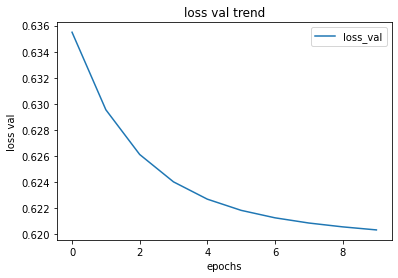

In [28]:
M1obj_1.loss_val_trend(epochs, loss_val_list)

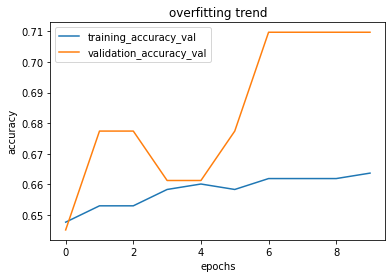

In [29]:
M1obj_1.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [71]:
print(result)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [72]:
M1obj_1_submission = get_dataframe(result)

M1obj_1_submission.to_csv('M1obj_1_submission.csv', index=False)

## M1obj_2 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 80
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 100


In [31]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 80
output_nodes = 1

learning_rate = 1e-1
epochs = 100

In [32]:
M1obj_2 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_2.X
T = M1obj_2.T

loss = M1obj_2.loss_val()

train = M1obj_2.train()

In [33]:
predicted = M1obj_2.predict()

accuracy = M1obj_2.accuracy()

In [34]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  1.4053191
epochs =  0 , step =  56 , loss_val =  0.670601
epochs =  0 , step =  112 , loss_val =  0.65470445
epochs =  0 , step =  168 , loss_val =  0.64516354
epochs =  0 , step =  224 , loss_val =  0.63943946
epochs =  0 , step =  280 , loss_val =  0.6358921
epochs =  0 , step =  336 , loss_val =  0.6335863
epochs =  0 , step =  392 , loss_val =  0.6320056
epochs =  0 , step =  448 , loss_val =  0.6308632
epochs =  0 , step =  504 , loss_val =  0.62999576
epochs =  0 , step =  560 , loss_val =  0.62930757
epochs =  1 , step =  0 , loss_val =  0.62928545
epochs =  1 , step =  56 , loss_val =  0.6287226
epochs =  1 , step =  112 , loss_val =  0.62824434
epochs =  1 , step =  168 , loss_val =  0.62782824
epochs =  1 , step =  224 , loss_val =  0.6274593
epochs =  1 , step =  280 , loss_val =  0.6271271
epochs =  1 , step =  336 , loss_val =  0.6268246
epochs =  1 , step =  392 , loss_val =  0.62654644
epochs =  1 , step =  448 , loss_val =  0.626288

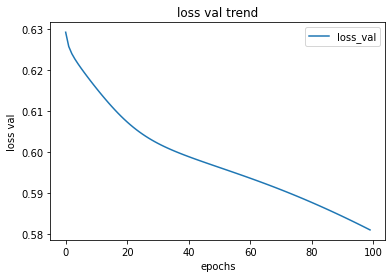

In [35]:
M1obj_2.loss_val_trend(epochs, loss_val_list)

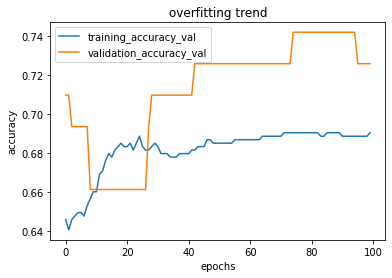

In [36]:
M1obj_2.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M1obj_2_submission = get_dataframe(result)

M1obj_2_submission.to_csv('M1obj_2_submission.csv', index=False)

## M1obj_3 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 50
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 70

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 50
output_nodes = 1

learning_rate = 1e-1
epochs = 70

In [ ]:
M1obj_3 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_3.X
T = M1obj_3.T

loss = M1obj_3.loss_val()

train = M1obj_3.train()

In [ ]:
predicted = M1obj_3.predict()

accuracy = M1obj_3.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  3.7563877
epochs =  0 , step =  56 , loss_val =  0.5760981
epochs =  0 , step =  112 , loss_val =  0.5471891
epochs =  0 , step =  168 , loss_val =  0.5428507
epochs =  0 , step =  224 , loss_val =  0.5338238
epochs =  0 , step =  280 , loss_val =  0.529435
epochs =  0 , step =  336 , loss_val =  0.52360505
epochs =  0 , step =  392 , loss_val =  0.5184887
epochs =  0 , step =  448 , loss_val =  0.51164824
epochs =  0 , step =  504 , loss_val =  0.5029026
epochs =  0 , step =  560 , loss_val =  0.54283845
epochs =  1 , step =  0 , loss_val =  0.5253128
epochs =  1 , step =  56 , loss_val =  0.48826376
epochs =  1 , step =  112 , loss_val =  0.48882568
epochs =  1 , step =  168 , loss_val =  0.47566766
epochs =  1 , step =  224 , loss_val =  0.4723855
epochs =  1 , step =  280 , loss_val =  0.49844986
epochs =  1 , step =  336 , loss_val =  0.4678015
epochs =  1 , step =  392 , loss_val =  0.47330582
epochs =  1 , step =  448 , loss_val =  0.464253


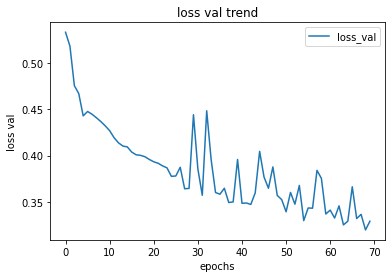

In [ ]:
M1obj_3.loss_val_trend(epochs, loss_val_list)

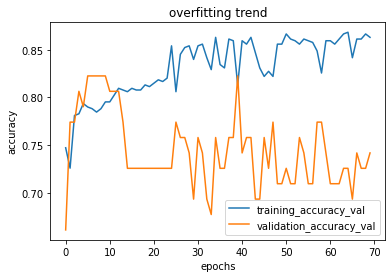

In [ ]:
M1obj_3.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M1obj_3_submission = get_dataframe(result)

M1obj_3_submission.to_csv('M1obj_3_submission.csv', index=False)

## M1obj_4 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 50
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 100

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 50
output_nodes = 1

learning_rate = 1e-2
epochs = 100

In [ ]:
M1obj_4 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_4.X
T = M1obj_4.T

loss = M1obj_4.loss_val()

train = M1obj_4.train()

In [ ]:
predicted = M1obj_4.predict()

accuracy = M1obj_4.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  2.5239234
epochs =  0 , step =  56 , loss_val =  0.66784066
epochs =  0 , step =  112 , loss_val =  0.651763
epochs =  0 , step =  168 , loss_val =  0.6510939
epochs =  0 , step =  224 , loss_val =  0.65049714
epochs =  0 , step =  280 , loss_val =  0.64991236
epochs =  0 , step =  336 , loss_val =  0.6493388
epochs =  0 , step =  392 , loss_val =  0.64877653
epochs =  0 , step =  448 , loss_val =  0.64822495
epochs =  0 , step =  504 , loss_val =  0.6476844
epochs =  0 , step =  560 , loss_val =  0.6471542
epochs =  1 , step =  0 , loss_val =  0.64713544
epochs =  1 , step =  56 , loss_val =  0.646616
epochs =  1 , step =  112 , loss_val =  0.64610666
epochs =  1 , step =  168 , loss_val =  0.6456072
epochs =  1 , step =  224 , loss_val =  0.6451175
epochs =  1 , step =  280 , loss_val =  0.6446373
epochs =  1 , step =  336 , loss_val =  0.64416647
epochs =  1 , step =  392 , loss_val =  0.6437047
epochs =  1 , step =  448 , loss_val =  0.6432519


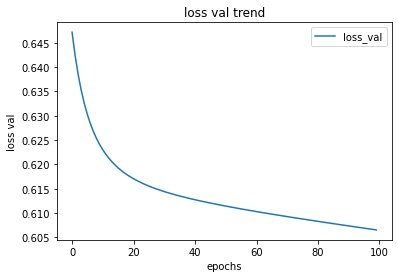

In [ ]:
M1obj_4.loss_val_trend(epochs, loss_val_list)

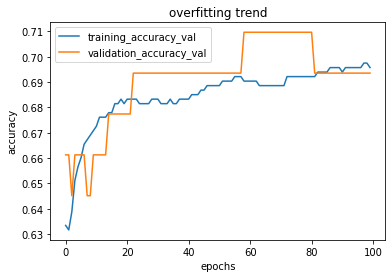

In [ ]:
M1obj_4.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M1obj_4_submission = get_dataframe(result)

M1obj_4_submission.to_csv('M1obj_4_submission.csv', index=False)

## M1obj_5 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 100

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-2
epochs = 100

In [ ]:
M1obj_5 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_5.X
T = M1obj_5.T

loss = M1obj_5.loss_val()

train = M1obj_5.train()

In [ ]:
predicted = M1obj_5.predict()

accuracy = M1obj_5.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  1.8084601
epochs =  0 , step =  56 , loss_val =  0.6419272
epochs =  0 , step =  112 , loss_val =  0.56834817
epochs =  0 , step =  168 , loss_val =  0.55450696
epochs =  0 , step =  224 , loss_val =  0.544697
epochs =  0 , step =  280 , loss_val =  0.5344173
epochs =  0 , step =  336 , loss_val =  0.5288762
epochs =  0 , step =  392 , loss_val =  0.52560985
epochs =  0 , step =  448 , loss_val =  0.52304864
epochs =  0 , step =  504 , loss_val =  0.52082837
epochs =  0 , step =  560 , loss_val =  0.5188357
epochs =  1 , step =  0 , loss_val =  0.51876277
epochs =  1 , step =  56 , loss_val =  0.5166373
epochs =  1 , step =  112 , loss_val =  0.51500636
epochs =  1 , step =  168 , loss_val =  0.5136087
epochs =  1 , step =  224 , loss_val =  0.51227844
epochs =  1 , step =  280 , loss_val =  0.5109746
epochs =  1 , step =  336 , loss_val =  0.50973296
epochs =  1 , step =  392 , loss_val =  0.5085518
epochs =  1 , step =  448 , loss_val =  0.507412

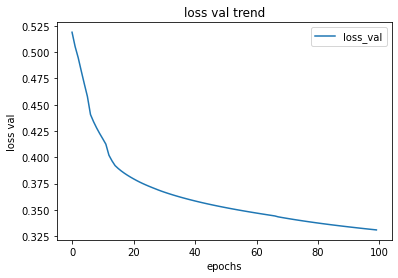

In [ ]:
M1obj_5.loss_val_trend(epochs, loss_val_list)

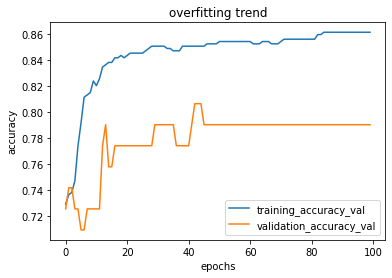

In [ ]:
M1obj_5.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M1obj_5_submission = get_dataframe(result)

M1obj_5_submission.to_csv('M1obj_5_submission.csv', index=False)

## M1obj_6 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 100

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-1
epochs = 100

In [ ]:
M1obj_6 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_6.X
T = M1obj_6.T

loss = M1obj_6.loss_val()

train = M1obj_6.train()

In [ ]:
predicted = M1obj_6.predict()

accuracy = M1obj_6.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  4.1942115
epochs =  0 , step =  56 , loss_val =  0.5451243
epochs =  0 , step =  112 , loss_val =  0.5382771
epochs =  0 , step =  168 , loss_val =  0.525145
epochs =  0 , step =  224 , loss_val =  0.5210718
epochs =  0 , step =  280 , loss_val =  0.513282
epochs =  0 , step =  336 , loss_val =  0.50839025
epochs =  0 , step =  392 , loss_val =  0.50540495
epochs =  0 , step =  448 , loss_val =  0.5026446
epochs =  0 , step =  504 , loss_val =  0.5052857
epochs =  0 , step =  560 , loss_val =  0.50249994
epochs =  1 , step =  0 , loss_val =  0.4907025
epochs =  1 , step =  56 , loss_val =  0.4892549
epochs =  1 , step =  112 , loss_val =  0.49723583
epochs =  1 , step =  168 , loss_val =  0.49646068
epochs =  1 , step =  224 , loss_val =  0.4898408
epochs =  1 , step =  280 , loss_val =  0.48748654
epochs =  1 , step =  336 , loss_val =  0.48459145
epochs =  1 , step =  392 , loss_val =  0.4978061
epochs =  1 , step =  448 , loss_val =  0.4706975
e

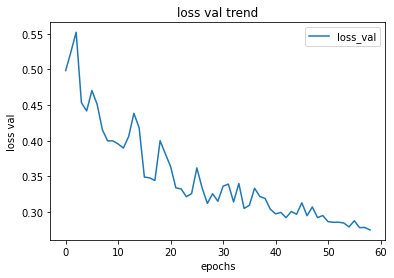

In [ ]:
M1obj_6.loss_val_trend(epochs, loss_val_list)

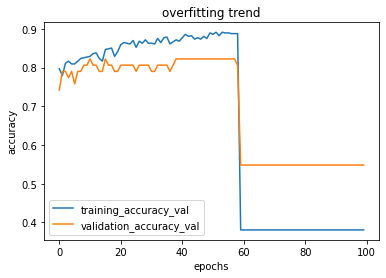

In [ ]:
M1obj_6.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M1obj_6_submission = get_dataframe(result)

M1obj_6_submission.to_csv('M1obj_6_submission.csv', index=False)

## M1obj_7 (DNN Model 1, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 20

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-1
epochs = 20

In [ ]:
M1obj_7 = Model1(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M1obj_7.X
T = M1obj_7.T

loss = M1obj_7.loss_val()

train = M1obj_7.train()

In [ ]:
predicted = M1obj_7.predict()

accuracy = M1obj_7.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  1.3686932
epochs =  0 , step =  56 , loss_val =  0.6020236
epochs =  0 , step =  112 , loss_val =  0.5803761
epochs =  0 , step =  168 , loss_val =  0.5579236
epochs =  0 , step =  224 , loss_val =  0.5309091
epochs =  0 , step =  280 , loss_val =  0.5016842
epochs =  0 , step =  336 , loss_val =  0.47393343
epochs =  0 , step =  392 , loss_val =  0.4557501
epochs =  0 , step =  448 , loss_val =  0.45003352
epochs =  0 , step =  504 , loss_val =  0.44561172
epochs =  0 , step =  560 , loss_val =  0.463109
epochs =  1 , step =  0 , loss_val =  0.46482974
epochs =  1 , step =  56 , loss_val =  0.44421583
epochs =  1 , step =  112 , loss_val =  0.4449731
epochs =  1 , step =  168 , loss_val =  0.44370613
epochs =  1 , step =  224 , loss_val =  0.44513857
epochs =  1 , step =  280 , loss_val =  0.44304663
epochs =  1 , step =  336 , loss_val =  0.44731265
epochs =  1 , step =  392 , loss_val =  0.44238585
epochs =  1 , step =  448 , loss_val =  0.44798

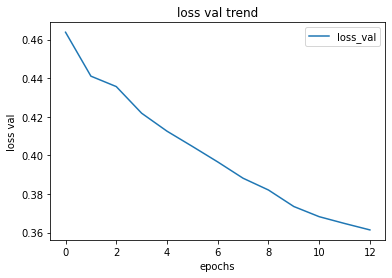

In [ ]:
M1obj_7.loss_val_trend(epochs, loss_val_list)

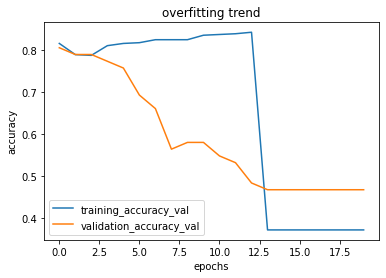

In [ ]:
M1obj_7.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M1obj_7_submission = get_dataframe(result)

M1obj_7_submission.to_csv('M1obj_7_submission.csv', index=False)

## DNN Model 2


- number of hidden node = 1
----
- error = Cross Entropy
- optimizer = Adam
----
- loss value trend method = True
- accuracy value trend method = True

In [ ]:
class Model2:

  def __init__(self, learning_rate, input_nodes, hidden_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_nodes, self.output_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.output_nodes]))     # 바이어스 노드

    self.z2 = tf.matmul(self.X, self.W2) + self.b2
    self.a2 = tf.sigmoid(self.z2)

    self.z3 = tf.matmul(self.a2, self.W3) + self.b3
    self.a3 = self.y = tf.sigmoid(self.z3)

    self.optimizer = tf.train.AdamOptimizer(self.learning_rate)

  def __feed_forward(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def loss_val(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

  def predict(self):
    return tf.cast(self.y > 0.5, dtype=tf.float32)

  def accuracy(self):
    return tf.reduce_mean(tf.cast(tf.equal(self.predict(), self.T), dtype=tf.float32))

## M2obj_1 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.0001
- epochs = 100

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-4
epochs = 100

In [ ]:
M2obj_1 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_1.X
T = M2obj_1.T

loss = M2obj_1.loss_val()

train = M2obj_1.train()

In [ ]:
predicted = M2obj_1.predict()

accuracy = M2obj_1.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  0.76370037
epochs =  0 , step =  56 , loss_val =  0.69845
epochs =  0 , step =  112 , loss_val =  0.66744995
epochs =  0 , step =  168 , loss_val =  0.6547854
epochs =  0 , step =  224 , loss_val =  0.64976525
epochs =  0 , step =  280 , loss_val =  0.6473274
epochs =  0 , step =  336 , loss_val =  0.6456647
epochs =  0 , step =  392 , loss_val =  0.6442655
epochs =  0 , step =  448 , loss_val =  0.64299697
epochs =  0 , step =  504 , loss_val =  0.6418173
epochs =  0 , step =  560 , loss_val =  0.64070696
epochs =  1 , step =  0 , loss_val =  0.64066845
epochs =  1 , step =  56 , loss_val =  0.6396179
epochs =  1 , step =  112 , loss_val =  0.638617
epochs =  1 , step =  168 , loss_val =  0.6376598
epochs =  1 , step =  224 , loss_val =  0.6367421
epochs =  1 , step =  280 , loss_val =  0.63586026
epochs =  1 , step =  336 , loss_val =  0.63501143
epochs =  1 , step =  392 , loss_val =  0.63419324
epochs =  1 , step =  448 , loss_val =  0.6334038


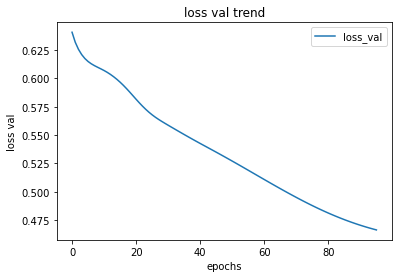

In [ ]:
M2obj_1.loss_val_trend(epochs, loss_val_list)

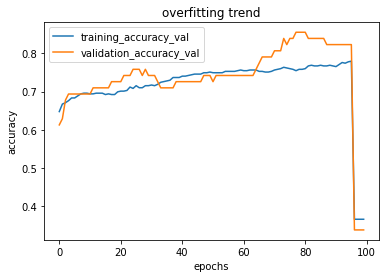

In [ ]:
M2obj_1.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M2obj_1_submission = get_dataframe(result)

M2obj_1_submission.to_csv('M2obj_1_submission.csv', index=False)

## M2obj_2 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.001
- epochs = 50

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 20
output_nodes = 1

learning_rate = 1e-3
epochs = 50

In [ ]:
M2obj_2 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_2.X
T = M2obj_2.T

loss = M2obj_2.loss_val()

train = M2obj_2.train()

In [ ]:
predicted = M2obj_2.predict()

accuracy = M2obj_2.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  0.77139795
epochs =  0 , step =  56 , loss_val =  0.6755356
epochs =  0 , step =  112 , loss_val =  0.66688937
epochs =  0 , step =  168 , loss_val =  0.6642377
epochs =  0 , step =  224 , loss_val =  0.66154563
epochs =  0 , step =  280 , loss_val =  0.6589009
epochs =  0 , step =  336 , loss_val =  0.6563498
epochs =  0 , step =  392 , loss_val =  0.65391695
epochs =  0 , step =  448 , loss_val =  0.65161383
epochs =  0 , step =  504 , loss_val =  0.64944404
epochs =  0 , step =  560 , loss_val =  0.647407
epochs =  1 , step =  0 , loss_val =  0.64733666
epochs =  1 , step =  56 , loss_val =  0.6454332
epochs =  1 , step =  112 , loss_val =  0.6436535
epochs =  1 , step =  168 , loss_val =  0.6419913
epochs =  1 , step =  224 , loss_val =  0.64044034
epochs =  1 , step =  280 , loss_val =  0.63899404
epochs =  1 , step =  336 , loss_val =  0.6376462
epochs =  1 , step =  392 , loss_val =  0.6363907
epochs =  1 , step =  448 , loss_val =  0.635221

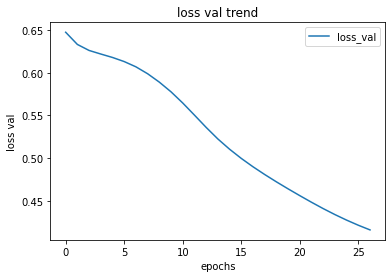

In [ ]:
M2obj_2.loss_val_trend(epochs, loss_val_list)

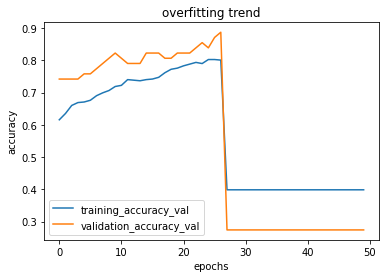

In [ ]:
M2obj_2.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M2obj_2_submission = get_dataframe(result)

M2obj_2_submission.to_csv('M2obj_2_submission.csv', index=False)

## M2obj_3 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.001
- epochs = 30

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-3
epochs = 30

In [ ]:
M2obj_3 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_3.X
T = M2obj_3.T

loss = M2obj_3.loss_val()

train = M2obj_3.train()

In [ ]:
predicted = M2obj_3.predict()

accuracy = M2obj_3.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  nan
epochs =  0 , step =  56 , loss_val =  nan
epochs =  0 , step =  112 , loss_val =  nan
epochs =  0 , step =  168 , loss_val =  nan
epochs =  0 , step =  224 , loss_val =  nan
epochs =  0 , step =  280 , loss_val =  nan
epochs =  0 , step =  336 , loss_val =  nan
epochs =  0 , step =  392 , loss_val =  nan
epochs =  0 , step =  448 , loss_val =  nan
epochs =  0 , step =  504 , loss_val =  nan
epochs =  0 , step =  560 , loss_val =  nan
epochs =  1 , step =  0 , loss_val =  nan
epochs =  1 , step =  56 , loss_val =  nan
epochs =  1 , step =  112 , loss_val =  nan
epochs =  1 , step =  168 , loss_val =  nan
epochs =  1 , step =  224 , loss_val =  nan
epochs =  1 , step =  280 , loss_val =  nan
epochs =  1 , step =  336 , loss_val =  nan
epochs =  1 , step =  392 , loss_val =  nan
epochs =  1 , step =  448 , loss_val =  nan
epochs =  1 , step =  504 , loss_val =  nan
epochs =  1 , step =  560 , loss_val =  nan
epochs =  2 , step =  0 , loss_val =  

KeyboardInterrupt: ignored

In [ ]:
M2obj_3.loss_val_trend(epochs, loss_val_list)

In [ ]:
M2obj_3.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M2obj_3_submission = get_dataframe(result)

M2obj_3_submission.to_csv('M2obj_3_submission.csv', index=False)

## M2obj_4 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 10
- output nodes = 1 (0 or 1)
---
- learning rate = 0.001
- epochs = 40

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 10
output_nodes = 1

learning_rate = 1e-3
epochs = 40

In [ ]:
M2obj_4 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_4.X
T = M2obj_4.T

loss = M2obj_4.loss_val()

train = M2obj_4.train()

In [ ]:
predicted = M2obj_4.predict()

accuracy = M2obj_4.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  0.676192
epochs =  0 , step =  56 , loss_val =  0.66006655
epochs =  0 , step =  112 , loss_val =  0.6584105
epochs =  0 , step =  168 , loss_val =  0.6570576
epochs =  0 , step =  224 , loss_val =  0.6557852
epochs =  0 , step =  280 , loss_val =  0.6545751
epochs =  0 , step =  336 , loss_val =  0.65342087
epochs =  0 , step =  392 , loss_val =  0.6523184
epochs =  0 , step =  448 , loss_val =  0.65126455
epochs =  0 , step =  504 , loss_val =  0.6502562
epochs =  0 , step =  560 , loss_val =  0.6492907
epochs =  1 , step =  0 , loss_val =  0.64925694
epochs =  1 , step =  56 , loss_val =  0.64833283
epochs =  1 , step =  112 , loss_val =  0.6474463
epochs =  1 , step =  168 , loss_val =  0.64659506
epochs =  1 , step =  224 , loss_val =  0.64577705
epochs =  1 , step =  280 , loss_val =  0.64499044
epochs =  1 , step =  336 , loss_val =  0.6442335
epochs =  1 , step =  392 , loss_val =  0.6435045
epochs =  1 , step =  448 , loss_val =  0.6428017

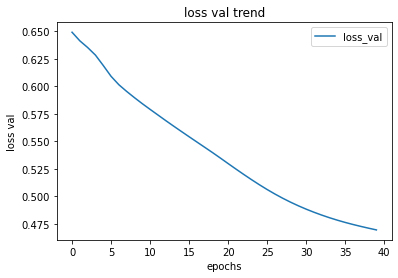

In [ ]:
M2obj_4.loss_val_trend(epochs, loss_val_list)

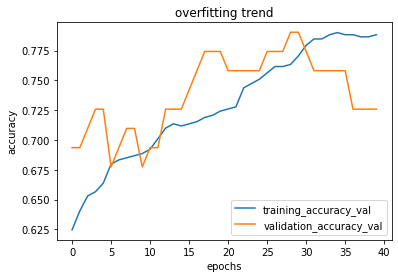

In [ ]:
M2obj_4.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M2obj_4_submission = get_dataframe(result)

M2obj_4_submission.to_csv('M2obj_4_submission.csv', index=False)

## M2obj_5 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 10
- output nodes = 1 (0 or 1)
---
- learning rate = 0.001
- epochs = 100

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 10
output_nodes = 1

learning_rate = 1e-3
epochs = 100

In [ ]:
M2obj_5 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_5.X
T = M2obj_5.T

loss = M2obj_5.loss_val()

train = M2obj_5.train()

In [ ]:
predicted = M2obj_5.predict()

accuracy = M2obj_5.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  0.7845039
epochs =  0 , step =  56 , loss_val =  0.7199403
epochs =  0 , step =  112 , loss_val =  0.68641365
epochs =  0 , step =  168 , loss_val =  0.6733497
epochs =  0 , step =  224 , loss_val =  0.66924286
epochs =  0 , step =  280 , loss_val =  0.66772705
epochs =  0 , step =  336 , loss_val =  0.66669863
epochs =  0 , step =  392 , loss_val =  0.66572666
epochs =  0 , step =  448 , loss_val =  0.6647586
epochs =  0 , step =  504 , loss_val =  0.6637955
epochs =  0 , step =  560 , loss_val =  0.6628417
epochs =  1 , step =  0 , loss_val =  0.66280794
epochs =  1 , step =  56 , loss_val =  0.6618675
epochs =  1 , step =  112 , loss_val =  0.66094255
epochs =  1 , step =  168 , loss_val =  0.6600346
epochs =  1 , step =  224 , loss_val =  0.6591447
epochs =  1 , step =  280 , loss_val =  0.6582732
epochs =  1 , step =  336 , loss_val =  0.65742034
epochs =  1 , step =  392 , loss_val =  0.656586
epochs =  1 , step =  448 , loss_val =  0.6557699

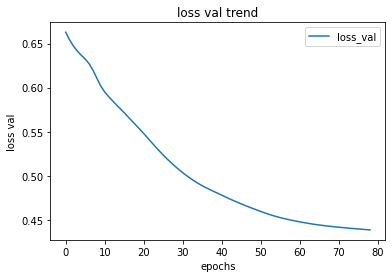

In [ ]:
M2obj_5.loss_val_trend(epochs, loss_val_list)

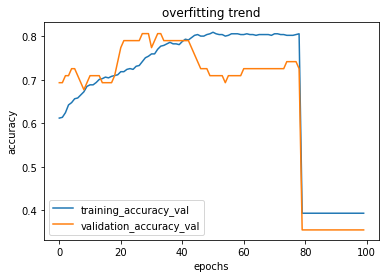

In [ ]:
M2obj_5.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M2obj_5_submission = get_dataframe(result)

M2obj_5_submission.to_csv('M2obj_5_submission.csv', index=False)

## M2obj_6 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 200
- output nodes = 1 (0 or 1)
---
- learning rate = 0.0001
- epochs = 80
---
- answer check = True

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 200
output_nodes = 1

learning_rate = 1e-4
epochs = 80

In [ ]:
M2obj_6 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_6.X
T = M2obj_6.T

loss = M2obj_6.loss_val()

train = M2obj_6.train()

In [ ]:
predicted = M2obj_6.predict()

accuracy = M2obj_6.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  2.5155685
epochs =  0 , step =  56 , loss_val =  2.2051306
epochs =  0 , step =  112 , loss_val =  1.8982433
epochs =  0 , step =  168 , loss_val =  1.59959
epochs =  0 , step =  224 , loss_val =  1.318696
epochs =  0 , step =  280 , loss_val =  1.0724133
epochs =  0 , step =  336 , loss_val =  0.882554
epochs =  0 , step =  392 , loss_val =  0.7624205
epochs =  0 , step =  448 , loss_val =  0.7027038
epochs =  0 , step =  504 , loss_val =  0.679
epochs =  0 , step =  560 , loss_val =  0.670703
epochs =  1 , step =  0 , loss_val =  0.6705359
epochs =  1 , step =  56 , loss_val =  0.6674028
epochs =  1 , step =  112 , loss_val =  0.66558176
epochs =  1 , step =  168 , loss_val =  0.6640793
epochs =  1 , step =  224 , loss_val =  0.6626651
epochs =  1 , step =  280 , loss_val =  0.6612949
epochs =  1 , step =  336 , loss_val =  0.65996253
epochs =  1 , step =  392 , loss_val =  0.65866804
epochs =  1 , step =  448 , loss_val =  0.65741205
epochs =  1

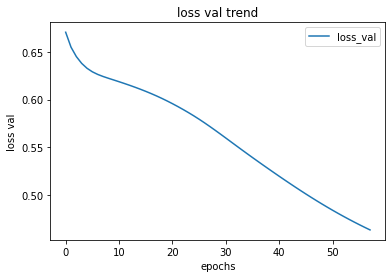

In [ ]:
M2obj_6.loss_val_trend(epochs, loss_val_list)

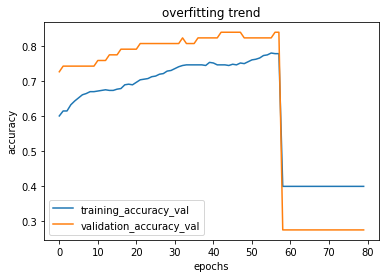

In [ ]:
M2obj_6.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [ ]:
M2obj_6_submission = get_dataframe(result)

M2obj_6_submission.to_csv('M2obj_6_submission.csv', index=False)

## M2obj_7 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 1000
- output nodes = 1 (0 or 1)
---
- learning rate = 0.00001
- epochs = 50
---
- answer check = True

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 1000
output_nodes = 1

learning_rate = 1e-5
epochs = 50

In [ ]:
M2obj_7 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_7.X
T = M2obj_7.T

loss = M2obj_7.loss_val()

train = M2obj_7.train()

In [ ]:
predicted = M2obj_7.predict()

accuracy = M2obj_7.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  nan
epochs =  0 , step =  56 , loss_val =  nan
epochs =  0 , step =  112 , loss_val =  nan
epochs =  0 , step =  168 , loss_val =  nan
epochs =  0 , step =  224 , loss_val =  nan
epochs =  0 , step =  280 , loss_val =  nan
epochs =  0 , step =  336 , loss_val =  nan
epochs =  0 , step =  392 , loss_val =  nan
epochs =  0 , step =  448 , loss_val =  nan
epochs =  0 , step =  504 , loss_val =  nan
epochs =  0 , step =  560 , loss_val =  nan
epochs =  1 , step =  0 , loss_val =  nan
epochs =  1 , step =  56 , loss_val =  nan
epochs =  1 , step =  112 , loss_val =  nan
epochs =  1 , step =  168 , loss_val =  nan
epochs =  1 , step =  224 , loss_val =  nan
epochs =  1 , step =  280 , loss_val =  nan
epochs =  1 , step =  336 , loss_val =  nan
epochs =  1 , step =  392 , loss_val =  nan
epochs =  1 , step =  448 , loss_val =  nan
epochs =  1 , step =  504 , loss_val =  nan
epochs =  1 , step =  560 , loss_val =  nan
epochs =  2 , step =  0 , loss_val =  

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-c48249bf75f1>", line 12, in <module>
    loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})
  File "/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py", line 956, in run
    run_metadata_ptr)
  File "/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py", line 1180, in _run
    feed_dict_tensor, options, run_metadata)
  File "/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py", line 1359, in _do_run
    run_metadata)
  File "/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py", line 1365, in _do_call
    return fn(*args)
  File "/tensorflow-1.15.2/python3.6/tensorflow_core/python/client/session.py", line 1350, in _run_fn
    target_list, run_metadata)
  File "/te

KeyboardInterrupt: ignored

In [ ]:
M2obj_7.loss_val_trend(epochs, loss_val_list)

In [ ]:
M2obj_7.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M2obj_7_submission = get_dataframe(result)

M2obj_7_submission.to_csv('M2obj_7_submission.csv', index=False)

## M2obj_8 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 1000
- output nodes = 1 (0 or 1)
---
- learning rate = 0.0001
- epochs = 20

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 1000
output_nodes = 1

learning_rate = 1e-4
epochs = 20

In [ ]:
M2obj_8 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_8.X
T = M2obj_8.T

loss = M2obj_8.loss_val()

train = M2obj_8.train()

In [ ]:
predicted = M2obj_8.predict()

accuracy = M2obj_8.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  nan
epochs =  0 , step =  56 , loss_val =  nan
epochs =  0 , step =  112 , loss_val =  nan
epochs =  0 , step =  168 , loss_val =  nan
epochs =  0 , step =  224 , loss_val =  nan
epochs =  0 , step =  280 , loss_val =  nan
epochs =  0 , step =  336 , loss_val =  nan
epochs =  0 , step =  392 , loss_val =  nan
epochs =  0 , step =  448 , loss_val =  nan
epochs =  0 , step =  504 , loss_val =  nan
epochs =  0 , step =  560 , loss_val =  nan
epochs =  1 , step =  0 , loss_val =  nan
epochs =  1 , step =  56 , loss_val =  nan
epochs =  1 , step =  112 , loss_val =  nan
epochs =  1 , step =  168 , loss_val =  nan
epochs =  1 , step =  224 , loss_val =  nan
epochs =  1 , step =  280 , loss_val =  nan
epochs =  1 , step =  336 , loss_val =  nan
epochs =  1 , step =  392 , loss_val =  nan
epochs =  1 , step =  448 , loss_val =  nan
epochs =  1 , step =  504 , loss_val =  nan
epochs =  1 , step =  560 , loss_val =  nan
epochs =  2 , step =  0 , loss_val =  

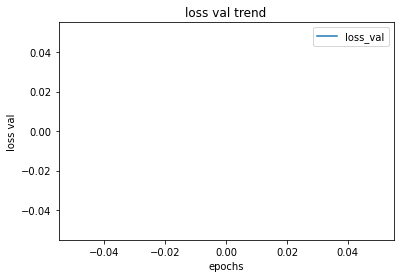

In [ ]:
M2obj_8.loss_val_trend(epochs, loss_val_list)

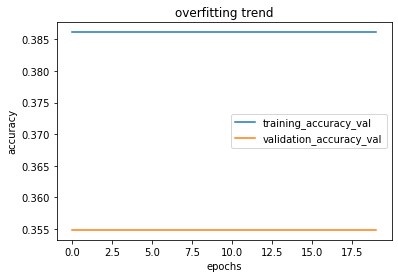

In [ ]:
M2obj_8.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M2obj_8_submission = get_dataframe(result)

M2obj_8_submission.to_csv('M2obj_8_submission.csv', index=False)

## M2obj_9 (DNN Model 2, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 200
- output nodes = 1 (0 or 1)
---
- learning rate = 0.0001
- epochs = 120

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 200
output_nodes = 1

learning_rate = 1e-4
epochs = 120

In [ ]:
M2obj_9 = Model2(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M2obj_9.X
T = M2obj_9.T

loss = M2obj_9.loss_val()

train = M2obj_9.train()

In [ ]:
predicted = M2obj_9.predict()

accuracy = M2obj_9.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  nan
epochs =  0 , step =  56 , loss_val =  nan
epochs =  0 , step =  112 , loss_val =  nan
epochs =  0 , step =  168 , loss_val =  nan
epochs =  0 , step =  224 , loss_val =  nan
epochs =  0 , step =  280 , loss_val =  nan
epochs =  0 , step =  336 , loss_val =  nan
epochs =  0 , step =  392 , loss_val =  nan
epochs =  0 , step =  448 , loss_val =  nan
epochs =  0 , step =  504 , loss_val =  nan
epochs =  0 , step =  560 , loss_val =  nan
epochs =  1 , step =  0 , loss_val =  nan
epochs =  1 , step =  56 , loss_val =  nan
epochs =  1 , step =  112 , loss_val =  nan
epochs =  1 , step =  168 , loss_val =  nan
epochs =  1 , step =  224 , loss_val =  nan
epochs =  1 , step =  280 , loss_val =  nan
epochs =  1 , step =  336 , loss_val =  nan
epochs =  1 , step =  392 , loss_val =  nan
epochs =  1 , step =  448 , loss_val =  nan
epochs =  1 , step =  504 , loss_val =  nan
epochs =  1 , step =  560 , loss_val =  nan
epochs =  2 , step =  0 , loss_val =  

In [ ]:
M2obj_9.loss_val_trend(epochs, loss_val_list)

In [ ]:
M2obj_9.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M2obj_9_submission = get_dataframe(result)

M2obj_9_submission.to_csv('M2obj_9_submission.csv', index=False)

## DNN Model 3


- number of hidden node = 2
----
- error = Cross Entropy
- optimizer = Adam
----
- loss value trend method = True
- accuracy value trend method = True

In [ ]:
class Model3:

  def __init__(self, learning_rate, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_1_nodes = hidden_1_nodes
    self.hidden_2_nodes = hidden_2_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_1_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_1_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_1_nodes, self.hidden_2_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.hidden_2_nodes]))     # 바이어스 노드

    self.W4 = tf.Variable(tf.random_normal([self.hidden_2_nodes, self.output_nodes]))
    self.b4 = tf.Variable(tf.random_normal([self.output_nodes]))

    self.Z2 = tf.matmul(self.X, self.W2) + self.b2
    self.A2 = tf.sigmoid(self.Z2)

    self.Z3 = tf.matmul(self.A2, self.W3) + self.b3
    self.A3 = tf.sigmoid(self.Z3)

    self.Z4 = tf.matmul(self.A3, self.W4) + self.b4
    self.A4 = self.y = tf.sigmoid(self.Z4)

    self.optimizer = tf.train.AdamOptimizer(self.learning_rate)

  def __feed_forward(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def loss_val(self):
    return -tf.reduce_mean( self.T*tf.log(self.y) + (1-self.T)*tf.log(1-self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

  def predict(self):
    return tf.cast(self.y > 0.5, dtype=tf.float32)

  def accuracy(self):
    return tf.reduce_mean(tf.cast(tf.equal(self.predict(), self.T), dtype=tf.float32))

## M3obj_1 (DNN Model 3, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden 1 nodes = 20
- hidden 2 nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 30

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_1_nodes = 20
hidden_2_nodes = 20
output_nodes = 1

learning_rate = 1e-1
epochs = 30

In [ ]:
M3obj_1 = Model3(learning_rate, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes)

X = M3obj_1.X
T = M3obj_1.T

loss = M3obj_1.loss_val()

train = M3obj_1.train()

In [ ]:
predicted = M3obj_1.predict()

accuracy = M3obj_1.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  1.2853974
epochs =  0 , step =  56 , loss_val =  0.62652826
epochs =  0 , step =  112 , loss_val =  0.5844676
epochs =  0 , step =  168 , loss_val =  0.5482923
epochs =  0 , step =  224 , loss_val =  0.47384578
epochs =  0 , step =  280 , loss_val =  0.43756807
epochs =  0 , step =  336 , loss_val =  0.42952973
epochs =  0 , step =  392 , loss_val =  0.40973893
epochs =  0 , step =  448 , loss_val =  0.40470004
epochs =  0 , step =  504 , loss_val =  0.39672565
epochs =  0 , step =  560 , loss_val =  0.39224818
epochs =  1 , step =  0 , loss_val =  0.391511
epochs =  1 , step =  56 , loss_val =  0.39145002
epochs =  1 , step =  112 , loss_val =  0.38383472
epochs =  1 , step =  168 , loss_val =  0.38013354
epochs =  1 , step =  224 , loss_val =  0.3775447
epochs =  1 , step =  280 , loss_val =  0.37451205
epochs =  1 , step =  336 , loss_val =  0.36938265
epochs =  1 , step =  392 , loss_val =  0.3685922
epochs =  1 , step =  448 , loss_val =  0.36

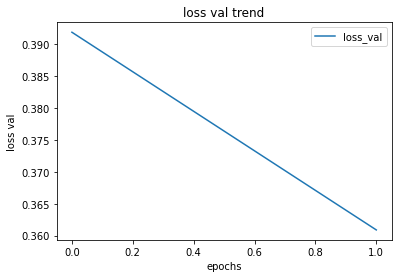

In [ ]:
M3obj_1.loss_val_trend(epochs, loss_val_list)

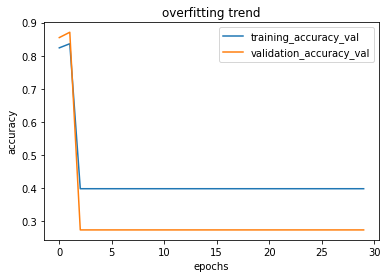

In [ ]:
M3obj_1.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M3obj_1_submission = get_dataframe(result)

M3obj_1_submission.to_csv('M3obj_1_submission.csv', index=False)

## M3obj_2 (DNN Model 3, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden 1 nodes = 20
- hidden 2 nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.01
- epochs = 30

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_1_nodes = 20
hidden_2_nodes = 20
output_nodes = 1

learning_rate = 1e-2
epochs = 30

In [ ]:
M3obj_2 = Model3(learning_rate, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes)

X = M3obj_2.X
T = M3obj_2.T

loss = M3obj_2.loss_val()

train = M3obj_2.train()

In [ ]:
predicted = M3obj_2.predict()

accuracy = M3obj_2.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  0.7550949
epochs =  0 , step =  56 , loss_val =  0.6461459
epochs =  0 , step =  112 , loss_val =  0.63341033
epochs =  0 , step =  168 , loss_val =  0.62142515
epochs =  0 , step =  224 , loss_val =  0.61078584
epochs =  0 , step =  280 , loss_val =  0.60155433
epochs =  0 , step =  336 , loss_val =  0.5924484
epochs =  0 , step =  392 , loss_val =  0.58092296
epochs =  0 , step =  448 , loss_val =  0.570005
epochs =  0 , step =  504 , loss_val =  0.5588797
epochs =  0 , step =  560 , loss_val =  0.5479785
epochs =  1 , step =  0 , loss_val =  0.54763013
epochs =  1 , step =  56 , loss_val =  0.5376126
epochs =  1 , step =  112 , loss_val =  0.5286341
epochs =  1 , step =  168 , loss_val =  0.5208172
epochs =  1 , step =  224 , loss_val =  0.5143828
epochs =  1 , step =  280 , loss_val =  0.508839
epochs =  1 , step =  336 , loss_val =  0.50625074
epochs =  1 , step =  392 , loss_val =  0.50117916
epochs =  1 , step =  448 , loss_val =  0.4984411


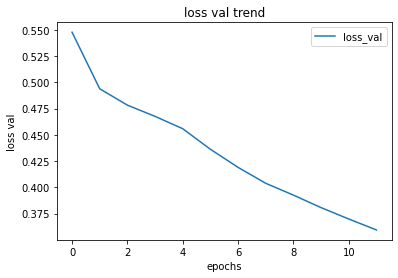

In [ ]:
M3obj_2.loss_val_trend(epochs, loss_val_list)

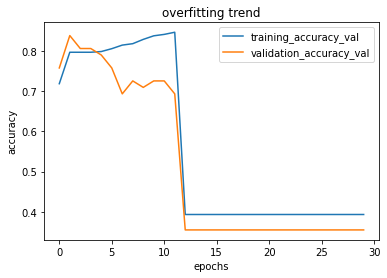

In [ ]:
M3obj_2.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M3obj_2_submission = get_dataframe(result)

M3obj_2_submission.to_csv('M3obj_2_submission.csv', index=False)

## M3obj_3 (DNN Model 3, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden 1 nodes = 10
- hidden 2 nodes = 10
- output nodes = 1 (0 or 1)
---
- learning rate = 0.001
- epochs = 30

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_1_nodes = 10
hidden_2_nodes = 10
output_nodes = 1

learning_rate = 1e-3
epochs = 30

In [ ]:
M3obj_3 = Model3(learning_rate, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes)

X = M3obj_3.X
T = M3obj_3.T

loss = M3obj_3.loss_val()

train = M3obj_3.train()

NameError: ignored

In [ ]:
predicted = M3obj_3.predict()

accuracy = M3obj_3.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

In [ ]:
M3obj_3.loss_val_trend(epochs, loss_val_list)

In [ ]:
M3obj_3.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M3obj_3_submission = get_dataframe(result)

M3obj_3_submission.to_csv('M3obj_3_submission.csv', index=False)

## M3obj_4 (DNN Model 3, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden 1 nodes = 20
- hidden 2 nodes = 20
- output nodes = 1 (0 or 1)
---
- learning rate = 0.0001
- epochs = 200

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_1_nodes = 20
hidden_2_nodes = 20
output_nodes = 1

learning_rate = 1e-4
epochs = 200

In [ ]:
M3obj_4 = Model3(learning_rate, input_nodes, hidden_1_nodes, hidden_2_nodes, output_nodes)

X = M3obj_4.X
T = M3obj_4.T

loss = M3obj_4.loss_val()

train = M3obj_4.train()

In [ ]:
predicted = M3obj_4.predict()

accuracy = M3obj_4.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  1.5265919
epochs =  0 , step =  56 , loss_val =  1.4169488
epochs =  0 , step =  112 , loss_val =  1.3129234
epochs =  0 , step =  168 , loss_val =  1.2156678
epochs =  0 , step =  224 , loss_val =  1.1261139
epochs =  0 , step =  280 , loss_val =  1.0450215
epochs =  0 , step =  336 , loss_val =  0.97290224
epochs =  0 , step =  392 , loss_val =  0.9099595
epochs =  0 , step =  448 , loss_val =  0.8560693
epochs =  0 , step =  504 , loss_val =  0.81080097
epochs =  0 , step =  560 , loss_val =  0.77347267
epochs =  1 , step =  0 , loss_val =  0.77227604
epochs =  1 , step =  56 , loss_val =  0.7422705
epochs =  1 , step =  112 , loss_val =  0.7183763
epochs =  1 , step =  168 , loss_val =  0.69964015
epochs =  1 , step =  224 , loss_val =  0.68515646
epochs =  1 , step =  280 , loss_val =  0.67410445
epochs =  1 , step =  336 , loss_val =  0.6657692
epochs =  1 , step =  392 , loss_val =  0.6595469
epochs =  1 , step =  448 , loss_val =  0.6549412

KeyboardInterrupt: ignored

In [ ]:
M3obj_4.loss_val_trend(epochs, loss_val_list)

In [ ]:
M3obj_4.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M3obj_4_submission = get_dataframe(result)

M3obj_4_submission.to_csv('M3obj_4_submission.csv', index=False)

## DNN Model 4


- number of hidden node = 1
----
- error = MSE
- optimizer = Adam
----
- loss value trend method = True
- accuracy value trend method = True

In [ ]:
class Model4:

  def __init__(self, learning_rate, input_nodes, hidden_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_nodes, self.output_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.output_nodes]))     # 바이어스 노드

    self.z2 = tf.matmul(self.X, self.W2) + self.b2
    self.a2 = tf.sigmoid(self.z2)

    self.z3 = tf.matmul(self.a2, self.W3) + self.b3
    self.a3 = self.y = tf.sigmoid(self.z3)

    self.optimizer = tf.train.AdamOptimizer(self.learning_rate)

  def __feed_forward(self):
    return tf.reduce_mean(tf.square(self.T - self.y))

  def loss_val(self):
    return tf.reduce_mean(tf.square(self.T - self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

  def predict(self):
    return tf.cast(self.y > 0.5, dtype=float32)

  def accuracy(self):
    return tf.reduce_mean(tf.cast(tf.equal(self.predict(), self.T), dtype=tf.float32))

## M4obj_1 (DNN Model 4, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 100

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-1
epochs = 100

In [ ]:
M4obj_1 = Model4(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M4obj_1.X
T = M4obj_1.T

loss = M4obj_1.loss_val()

train = M4obj_1.train()

In [ ]:
predicted = M4obj_1.predict()

accuracy = M4obj_1.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  0.60591173
epochs =  0 , step =  56 , loss_val =  0.39323843
epochs =  0 , step =  112 , loss_val =  0.39323843
epochs =  0 , step =  168 , loss_val =  0.39323843
epochs =  0 , step =  224 , loss_val =  0.39323843
epochs =  0 , step =  280 , loss_val =  0.39323843
epochs =  0 , step =  336 , loss_val =  0.39323843
epochs =  0 , step =  392 , loss_val =  0.39323843
epochs =  0 , step =  448 , loss_val =  0.39323843
epochs =  0 , step =  504 , loss_val =  0.39323843
epochs =  0 , step =  560 , loss_val =  0.39323843
epochs =  1 , step =  0 , loss_val =  0.39323843
epochs =  1 , step =  56 , loss_val =  0.39323843
epochs =  1 , step =  112 , loss_val =  0.39323843
epochs =  1 , step =  168 , loss_val =  0.39323843
epochs =  1 , step =  224 , loss_val =  0.39323843
epochs =  1 , step =  280 , loss_val =  0.39323843
epochs =  1 , step =  336 , loss_val =  0.39323843
epochs =  1 , step =  392 , loss_val =  0.39323843
epochs =  1 , step =  448 , loss_val 

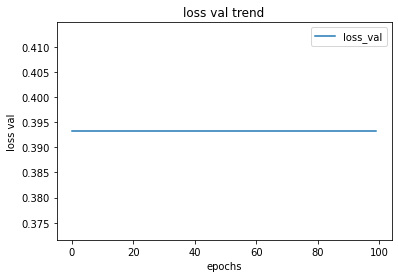

In [ ]:
M4obj_1.loss_val_trend(epochs, loss_val_list)

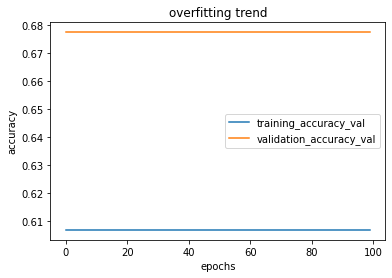

In [ ]:
M4obj_1.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M4obj_1_submission = get_dataframe(result)

M4obj_1_submission.to_csv('M4obj_1_submission.csv', index=False)

## DNN Model 5


- number of hidden node = 1
----
- error = MSE
- optimizer = Gredient Descent
----
- loss value trend method = True
- accuracy value trend method = True

In [ ]:
class Model5:

  def __init__(self, learning_rate, input_nodes, hidden_nodes, output_nodes):
    
    self.learning_rate = learning_rate

    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.X = tf.placeholder(tf.float32, [None, self.input_nodes])  # 7개 입력노드
    self.T = tf.placeholder(tf.float32, [None, self.output_nodes])  # 1개 정답노드

    self.W2 = tf.Variable(tf.random_normal([self.input_nodes, self.hidden_nodes]))  # 가중치 노드
    self.b2 = tf.Variable(tf.random_normal([self.hidden_nodes]))     # 바이어스 노드

    self.W3 = tf.Variable(tf.random_normal([self.hidden_nodes, self.output_nodes]))  # 가중치 노드
    self.b3 = tf.Variable(tf.random_normal([self.output_nodes]))     # 바이어스 노드

    self.z2 = tf.matmul(self.X, self.W2) + self.b2
    self.a2 = tf.sigmoid(self.z2)

    self.z3 = tf.matmul(self.a2, self.W3) + self.b3
    self.a3 = self.y = tf.sigmoid(self.z3)

    self.optimizer = tf.train.GradientDescentOptimizer(self.learning_rate)

  def __feed_forward(self):
    return tf.reduce_mean(tf.square(self.T - self.y))

  def loss_val(self):
    return tf.reduce_mean(tf.square(self.T - self.y))

  def train(self):
    return self.optimizer.minimize(self.loss_val())

  def loss_val_trend(self, epochs, loss_val_list):
    plt.plot(range(epochs), loss_val_list)
    plt.xlabel('epochs')
    plt.ylabel('loss val')
    plt.title('loss val trend')
    plt.legend(['loss_val'])
    plt.show()

  def accuracy_trend(self, epochs, training_accuracy_list, validation_accuracy_list):
    plt.plot(range(epochs), training_accuracy_list)
    plt.plot(range(epochs), validation_accuracy_list)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('overfitting trend')
    plt.legend(['training_accuracy_val', 'validation_accuracy_val'])
    plt.show()

  def predict(self):
    return tf.cast(self.y > 0.5, dtype=tf.float32)

  def accuracy(self):
    return tf.reduce_mean(tf.cast(tf.equal(self.predict(), self.T), dtype=tf.float32))

## M5obj_1 (DNN Model 5, GPU=True)

- input nodes = 6
> [ [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ]
- hidden nodes = 100
- output nodes = 1 (0 or 1)
---
- learning rate = 0.1
- epochs = 30

In [ ]:
input_nodes = training_data.shape[1] - 1
hidden_nodes = 100
output_nodes = 1

learning_rate = 1e-1
epochs = 30

In [ ]:
M5obj_1 = Model5(learning_rate, input_nodes, hidden_nodes, output_nodes)

X = M5obj_1.X
T = M5obj_1.T

loss = M5obj_1.loss_val()

train = M5obj_1.train()

In [ ]:
predicted = M5obj_1.predict()

accuracy = M5obj_1.accuracy()

In [ ]:
loss_val_list = []
training_accuracy_list = []
validation_accuracy_list = []

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):
    for step in range(len(training_data)):
      loss_val, _ = sess.run([loss, train], feed_dict={X: training_xdata, T: training_tdata})

      if step % (int)(0.1*len(training_data)) == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)

    loss_val_list.append(loss_val)

    training_accuracy_val = sess.run(accuracy, feed_dict={X: training_xdata, T: training_tdata})
    training_accuracy_list.append(training_accuracy_val)

    validation_accuracy_val = sess.run(accuracy, feed_dict={X: validation_xdata, T: validation_tdata})
    validation_accuracy_list.append(validation_accuracy_val)

  end_time = datetime.now()

  print("\nElasped time = ", end_time - start_time)

  accuracy_val = sess.run(accuracy, feed_dict={X: test_xdata, T: test_tdata})
  print("\nAccuracy = ", accuracy_val)

  result = sess.run(predicted, feed_dict={X: unknown_data})

epochs =  0 , step =  0 , loss_val =  0.4733024
epochs =  0 , step =  56 , loss_val =  0.22856058
epochs =  0 , step =  112 , loss_val =  0.22834788
epochs =  0 , step =  168 , loss_val =  0.22814344
epochs =  0 , step =  224 , loss_val =  0.22794689
epochs =  0 , step =  280 , loss_val =  0.2277579
epochs =  0 , step =  336 , loss_val =  0.22757606
epochs =  0 , step =  392 , loss_val =  0.22740108
epochs =  0 , step =  448 , loss_val =  0.22723259
epochs =  0 , step =  504 , loss_val =  0.22707035
epochs =  0 , step =  560 , loss_val =  0.22691397
epochs =  1 , step =  0 , loss_val =  0.22690852
epochs =  1 , step =  56 , loss_val =  0.22675802
epochs =  1 , step =  112 , loss_val =  0.22661287
epochs =  1 , step =  168 , loss_val =  0.22647282
epochs =  1 , step =  224 , loss_val =  0.22633769
epochs =  1 , step =  280 , loss_val =  0.22620718
epochs =  1 , step =  336 , loss_val =  0.22608113
epochs =  1 , step =  392 , loss_val =  0.22595932
epochs =  1 , step =  448 , loss_val = 

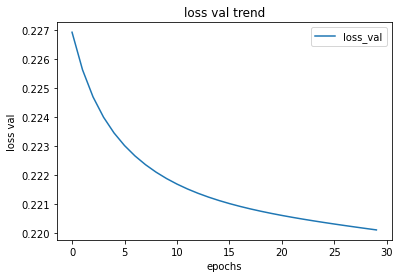

In [ ]:
M5obj_1.loss_val_trend(epochs, loss_val_list)

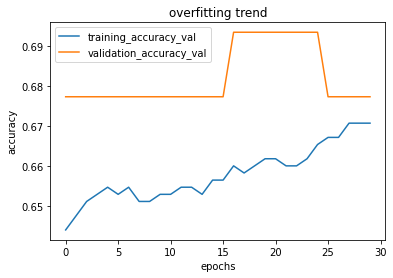

In [ ]:
M5obj_1.accuracy_trend(epochs, training_accuracy_list, validation_accuracy_list)

In [ ]:
print(result)

In [ ]:
M5obj_1_submission = get_dataframe(result)

M5obj_1_submission.to_csv('M5obj_1_submission.csv', index=False)